In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
sys.path.insert(0, os.path.abspath('../Libraries'))
from countries import get_iso_3_list

In [3]:
path = "../Datasets/oecd_employment.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
LOCATION,,,,,,,,,,,,,,,,
AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1959,1959,PER,Persons,3,Thousands,NaN,NaN,10160.968,NaN,NaN
AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1960,1960,PER,Persons,3,Thousands,NaN,NaN,10391.920,NaN,NaN
AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1961,1961,PER,Persons,3,Thousands,NaN,NaN,10642.654,NaN,NaN
AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1962,1962,PER,Persons,3,Thousands,NaN,NaN,10846.059,NaN,NaN
AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1963,1963,PER,Persons,3,Thousands,NaN,NaN,11055.482,NaN,NaN


In [6]:
df_2000 = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2021) & (df['MEASURE'] == 'PER') & (df['TRANSACT'].isin(['POPNC', 'ETO']))]

In [18]:
def format_data(df, transact_cd):
    # Filter by TRANSACT code and pivot table
    df_new = df[df['TRANSACT'] == transact_cd]
    df_new = pd.pivot_table(df_new, index=['LOCATION', 'PowerCode Code'], columns='TIME', values='Value')
    df_new.dropna(inplace=True)
    df_new = df_new.reset_index().rename_axis(None, axis=1)
    df_new.rename(columns={'PowerCode Code': 'POWER'}, inplace=True)

    # Multiple value for years by the power
    for year in range(len(df_new.columns[2:])):
        df_new[df_new.columns[year+2]] = df_new[df_new.columns[year+2]] * 10**df_new['POWER']
    df_new.drop(columns=['POWER'], inplace=True)

    # Remove countries that are not in the OECD
    df_popnc = df_popnc[df_popnc['LOCATION'].isin(get_iso_3_list())]

    df_new.reset_index(drop=True, inplace=True) # resets the index due to drops
    return df_new

In [19]:
df_eto = format_data(df_2000, 'ETO')
df_eto.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,3.754970e+06,3.782000e+06,3.778380e+06,3.803030e+06,3.826820e+06,3.872900e+06,3.940730e+06,4.012730e+06,4.089130e+06,...,4.205160e+06,4.219770e+06,4.259900e+06,4.285540e+06,4.341330e+06,4.412560e+06,4.487090e+06,4.535090e+06,4.460930e+06,4.551000e+06
1,BEL,4.109700e+06,4.166000e+06,4.175500e+06,4.171600e+06,4.212800e+06,4.273200e+06,4.321400e+06,4.393400e+06,4.471600e+06,...,4.572400e+06,4.559000e+06,4.577100e+06,4.617300e+06,4.675200e+06,4.748500e+06,4.818100e+06,4.895200e+06,4.898300e+06,4.989100e+06
2,BGR,3.239195e+06,3.214740e+06,3.222119e+06,3.317390e+06,3.403395e+06,3.495268e+06,3.612042e+06,3.726742e+06,3.814647e+06,...,3.436393e+06,3.421577e+06,3.434165e+06,3.446214e+06,3.463347e+06,3.525352e+06,3.521640e+06,3.533578e+06,3.451744e+06,3.458409e+06
3,CAN,1.506613e+07,1.520552e+07,1.557980e+07,1.591820e+07,1.617949e+07,1.642618e+07,1.666934e+07,1.699256e+07,1.724006e+07,...,1.769651e+07,1.790717e+07,1.799150e+07,1.812520e+07,1.829794e+07,1.868782e+07,1.898640e+07,1.938451e+07,1.756296e+07,1.905214e+07
4,CHE,4.021788e+06,4.088694e+06,4.117909e+06,4.103217e+06,4.114564e+06,4.144664e+06,4.234932e+06,4.344274e+06,4.448263e+06,...,4.679467e+06,4.736050e+06,4.825250e+06,4.899155e+06,4.967268e+06,5.012550e+06,5.064548e+06,5.101730e+06,5.076207e+06,5.105212e+06


In [28]:
df_eto = df_eto[df_eto['LOCATION'].isin(get_iso_3_list())]
df_eto.reset_index(drop=True, inplace=True)

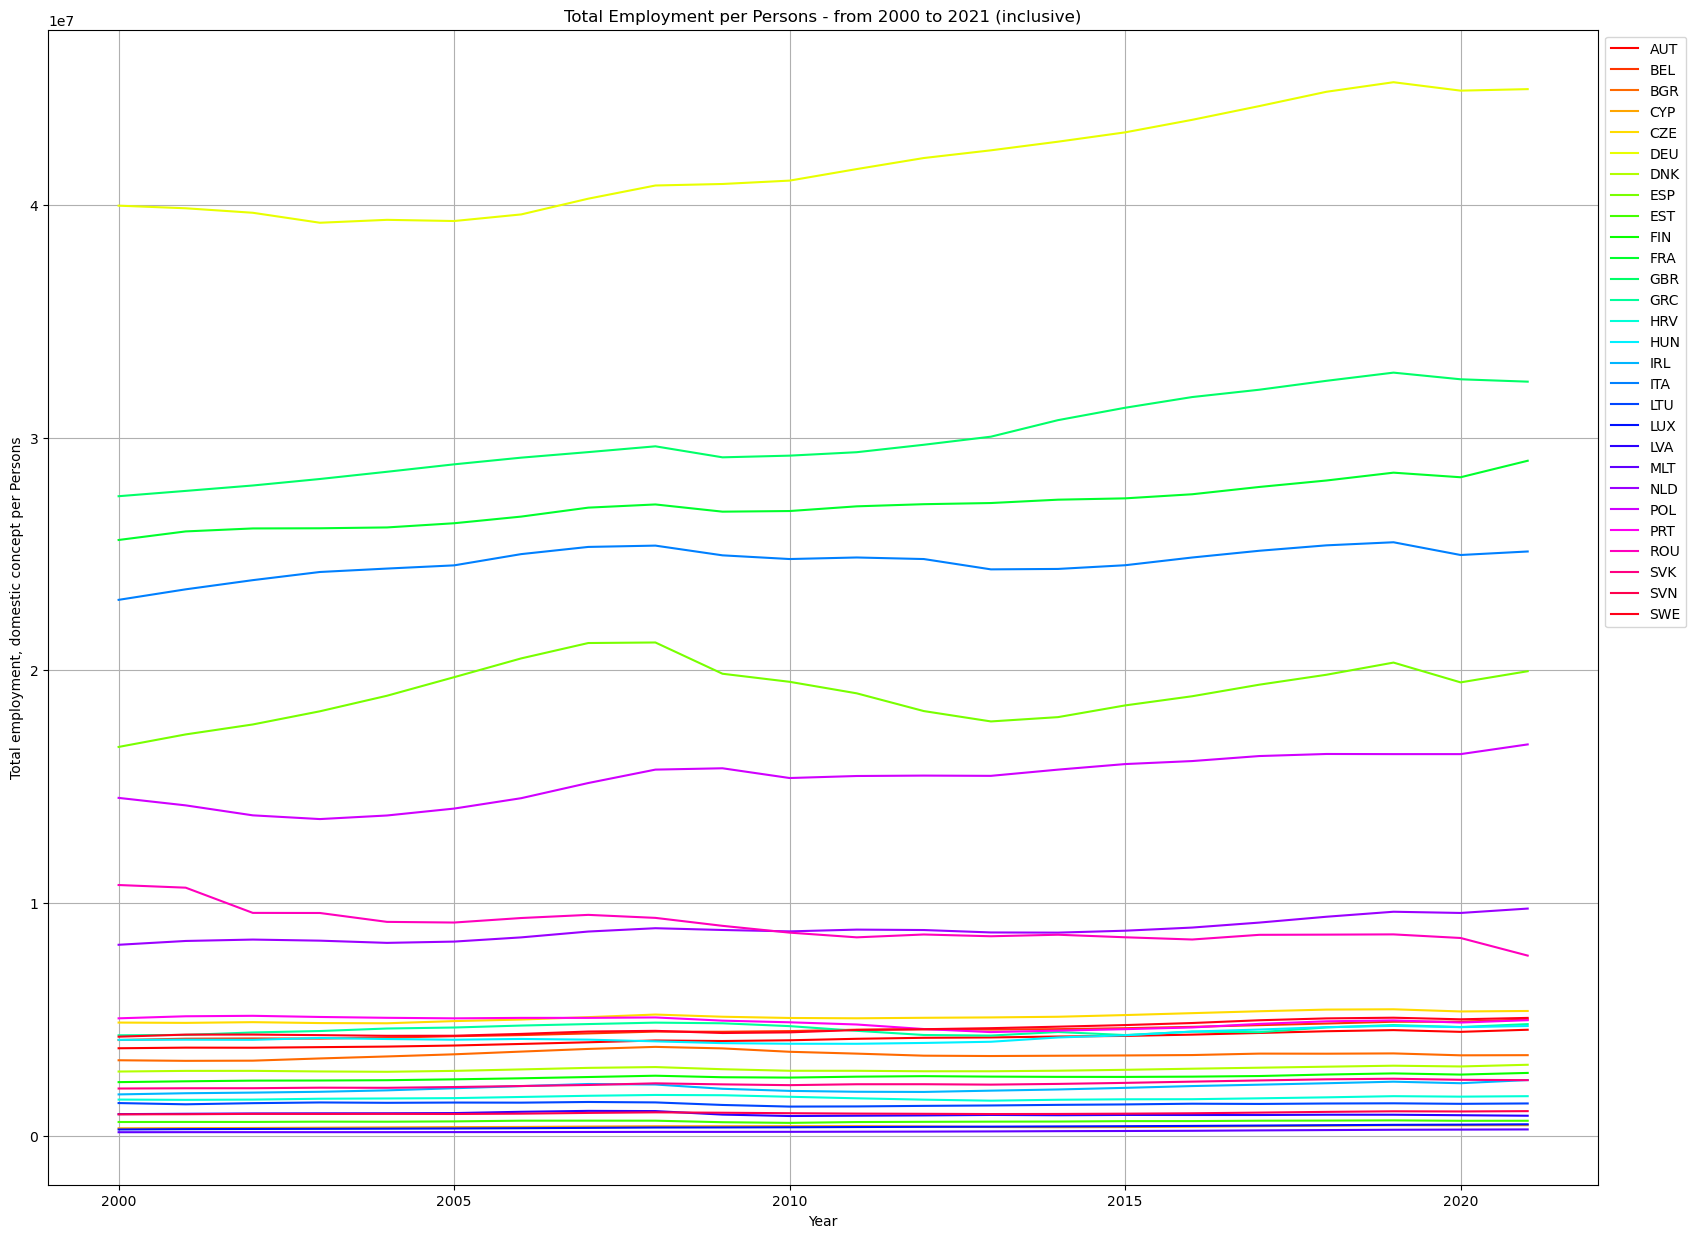

In [29]:
# plots every country's total employment from 2000 to 2022
plt.figure(figsize=(20, 15))

colors = plt.cm.hsv(np.linspace(0, 1, df_eto.shape[0]))

countryCodes = df_eto['LOCATION']
years = df_eto.keys()[1:]

for i in range(len(countryCodes)):
    countryCode = countryCodes[i]
    # Plot years to Value
    plt.plot(years, df_eto.loc[i, years], color=colors[i], label=countryCode)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Total employment, domestic concept per Persons')
plt.title("Total Employment per Persons - from 2000 to 2021 (inclusive)")
plt.show()

In [31]:
# However countries have varying population sizes, so we need to normalize the data
df_popnc = format_data(df_2000, 'POPNC')
df_popnc.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,8011566.0,8042293.0,8082121.0,8118245.0,8169441.0,8225278.0,8267948.0,8295189.0,8321541.0,...,8426311.0,8477230.0,8543932.0,8629519.0,8739806.0,8795073.0,8837707.0,8877637.0,8916845.0,8951520.0
1,BEL,10251000.0,10287000.0,10333000.0,10376000.0,10421000.0,10479000.0,10548000.0,10626000.0,10710000.0,...,11107000.0,11159000.0,11209000.0,11274000.0,11331000.0,11375000.0,11427000.0,11489000.0,11544000.0,11592000.0
2,BGR,8170172.0,7913301.0,7868900.0,7823557.0,7781161.0,7739900.0,7699020.0,7659764.0,7623395.0,...,7305888.0,7265115.0,7223937.0,7177991.0,7127821.5,7075946.5,7025036.5,6975760.5,6934015.0,6889362.0
3,CYP,694000.0,701500.0,709610.0,718307.0,727980.0,738540.0,750965.0,767125.0,786632.0,...,863945.0,861939.0,852504.0,847664.0,851561.0,859519.0,870068.0,881952.0,892003.0,900350.0
4,CZE,10272503.0,10224192.0,10200774.0,10201651.0,10206923.0,10234092.0,10266646.0,10322689.0,10429692.0,...,10509286.0,10510719.0,10524783.0,10542942.0,10565284.0,10589526.0,10626430.0,10669324.0,10700155.0,10697314.0


In [32]:
df_eto_norm = df_eto.copy()
for row in range(df_eto_norm.shape[0]):
    for col in range(df_eto_norm.shape[1]-1):
        df_eto_norm.iloc[row, col+1] = df_eto_norm.iloc[row, col+1] / df_popnc.iloc[row, col+1]

df_eto_norm.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,0.468694,0.470264,0.467499,0.468455,0.468431,0.470853,0.476627,0.483742,0.491391,...,0.499051,0.497777,0.498588,0.496614,0.496731,0.501708,0.507721,0.510844,0.500281,0.508405
1,BEL,0.400907,0.404977,0.404094,0.402043,0.404261,0.407787,0.409689,0.413458,0.417516,...,0.411668,0.408549,0.408342,0.409553,0.412603,0.417451,0.421642,0.426077,0.424316,0.430392
2,BGR,0.396466,0.406245,0.409475,0.424026,0.437389,0.451591,0.469156,0.486535,0.500387,...,0.470359,0.470960,0.475387,0.480108,0.485891,0.498216,0.501298,0.506551,0.497799,0.501993
3,CYP,0.453550,0.458405,0.462644,0.473481,0.485743,0.496191,0.497028,0.508101,0.512962,...,0.454671,0.430249,0.426284,0.435452,0.453647,0.473678,0.492953,0.504722,0.496427,0.497703
4,CZE,0.473044,0.474012,0.478079,0.474243,0.473099,0.481004,0.485940,0.493393,0.498968,...,0.481919,0.483405,0.485423,0.491505,0.498264,0.504821,0.509777,0.508968,0.498797,0.500845


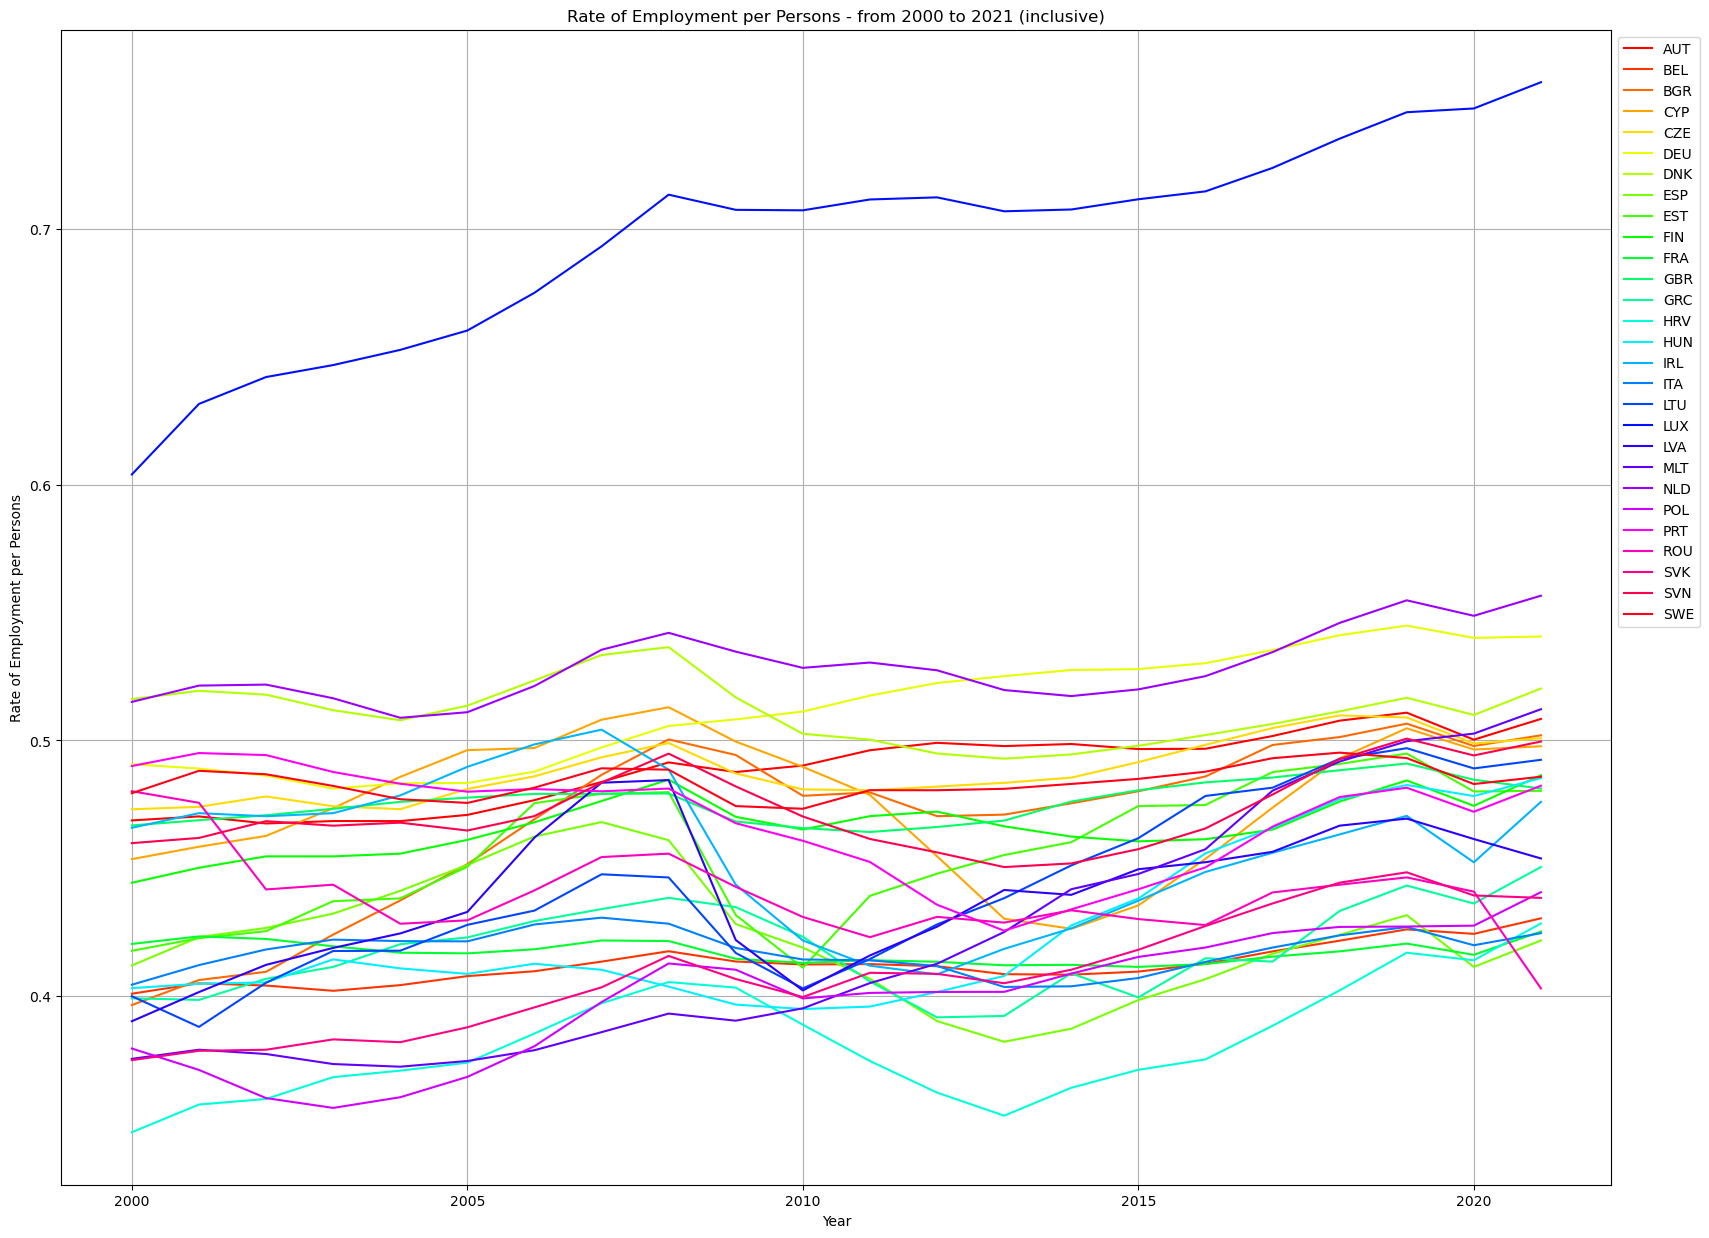

In [33]:
# plots every country's total employment from 2000 to 2022
plt.figure(figsize=(20, 15))

colors = plt.cm.hsv(np.linspace(0, 1, df_eto.shape[0]))

for i in range(len(countryCodes)):
    countryCode = countryCodes[i]
    # Plot years to Value
    plt.plot(years, df_eto_norm.loc[i, years], color=colors[i], label=countryCode)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Rate of Employment per Persons')
plt.title("Rate of Employment per Persons - from 2000 to 2021 (inclusive)")
plt.show()